# Example of Plots using GEOtoPy

In [ ]:
obs_path = '../data/Matsch B2/observations/obs.csv'
model_path = '../data/Matsch B2/geotop'
depths = [50, 200]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

from mhpc_project import FullModel
from geotopy.utils import date_parser, comparison_plot

In [3]:
observations = pd.read_csv(obs_path,
                           parse_dates=[0],
                           date_parser=date_parser,
                           index_col=0)

In [4]:
model = FullModel(model_path)
model.settings['SoilPlotDepths'] = depths
model.settings['SoilIceContentProfileFileWriteEnd'] = '"theta_ice"'
model.settings['PointAll'] = True
model.settings['PointOutputFileWriteEnd'] = '"point"'
model.settings['SoilTempProfileFileWriteEnd'] = '"temperature"'

simulation = model()

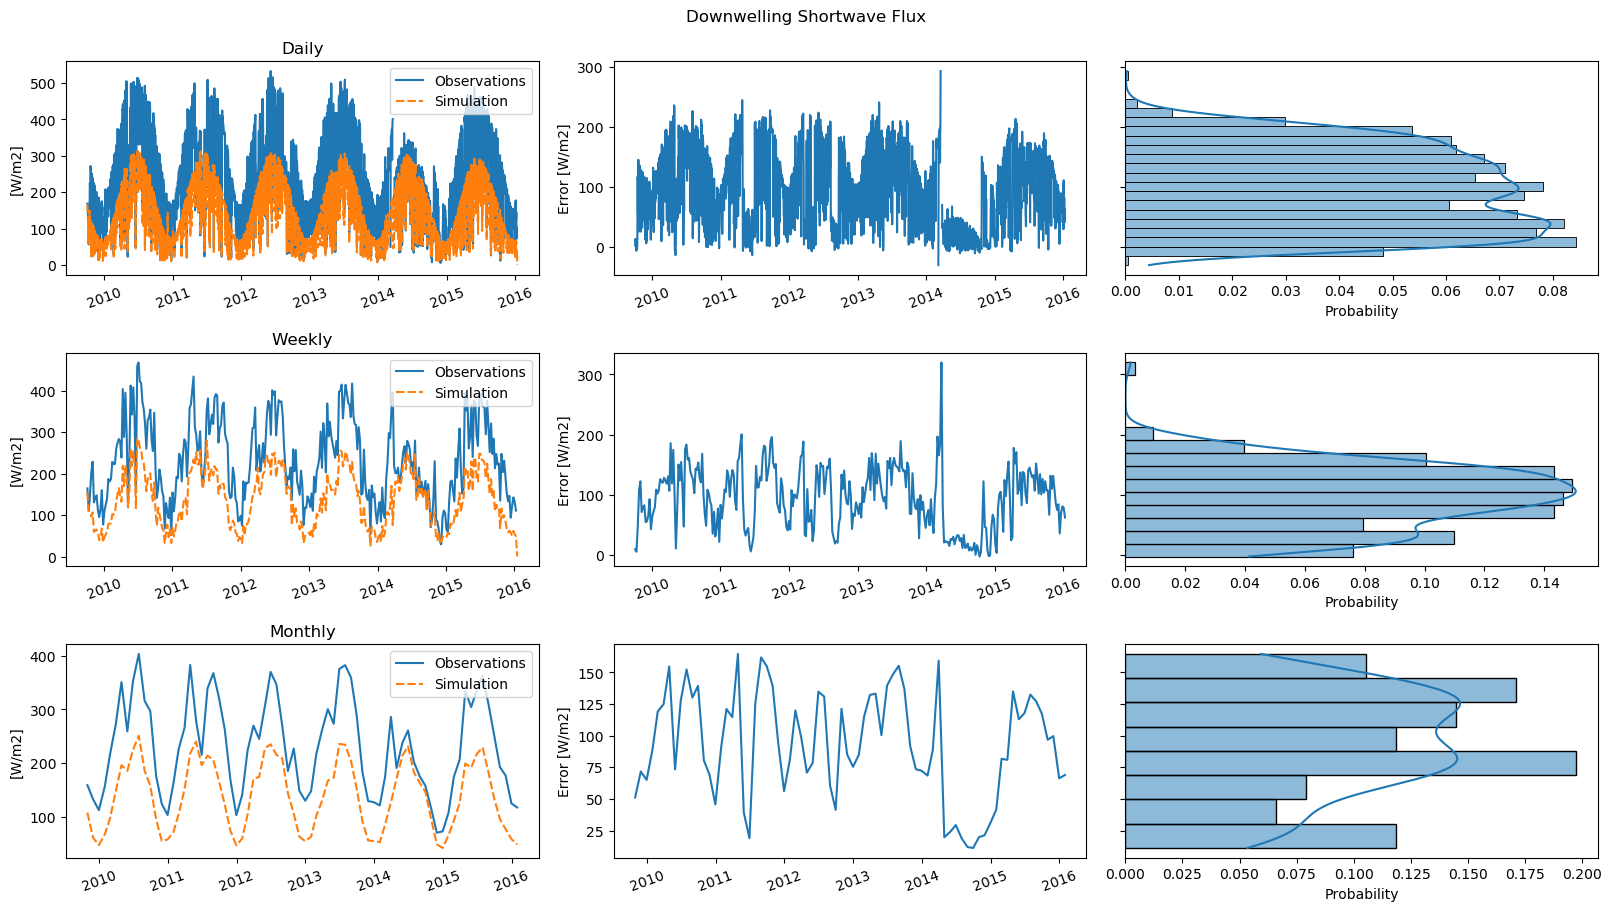

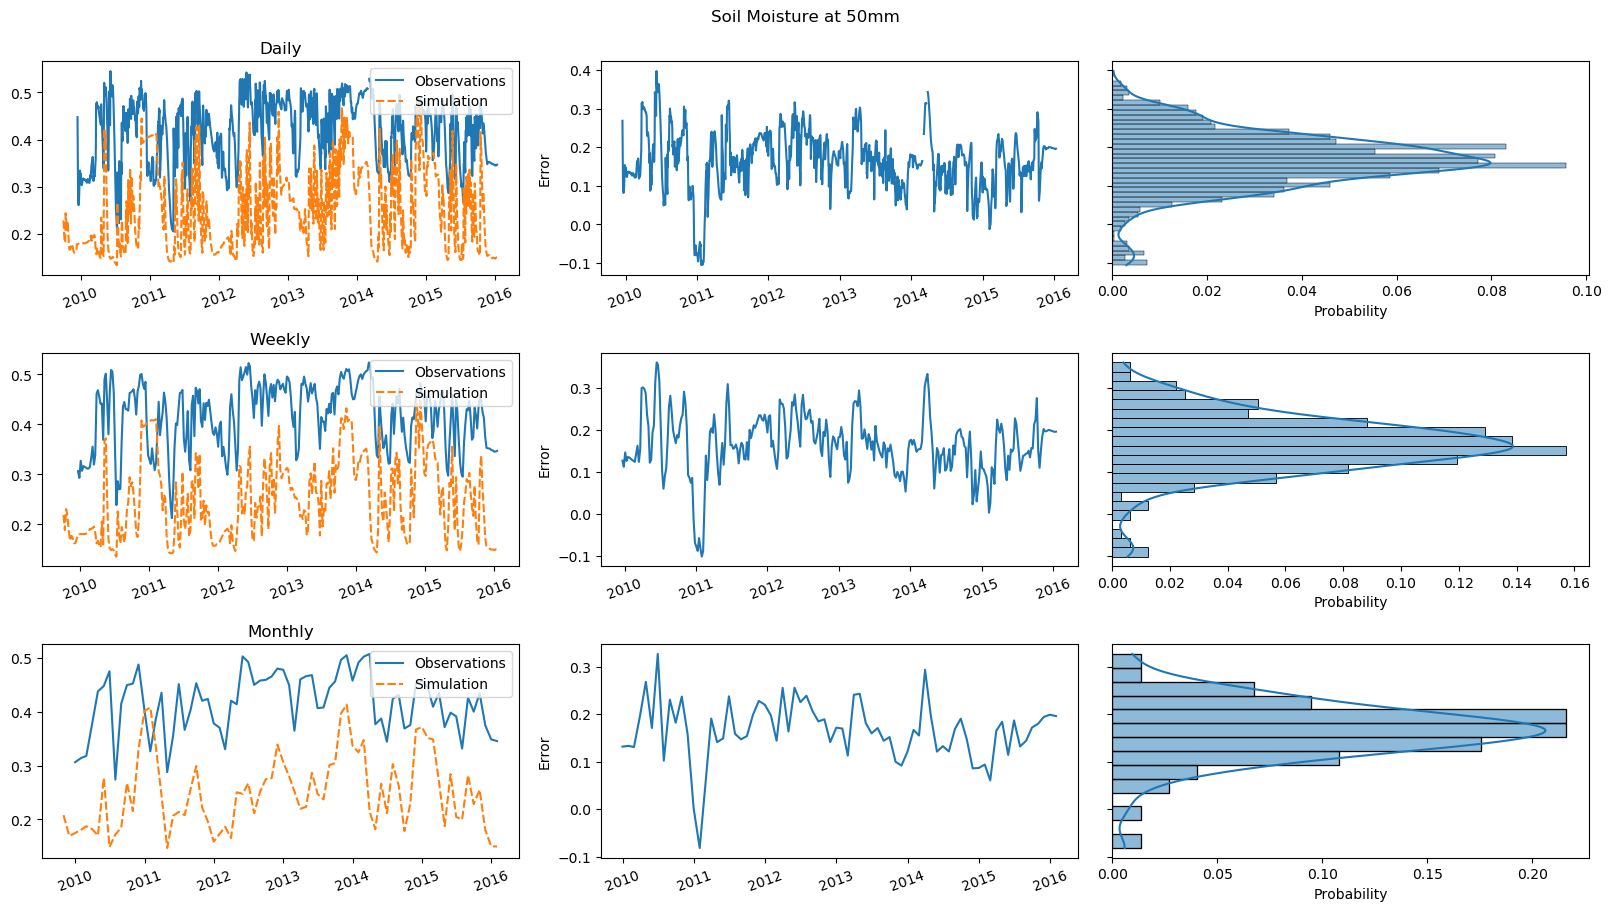

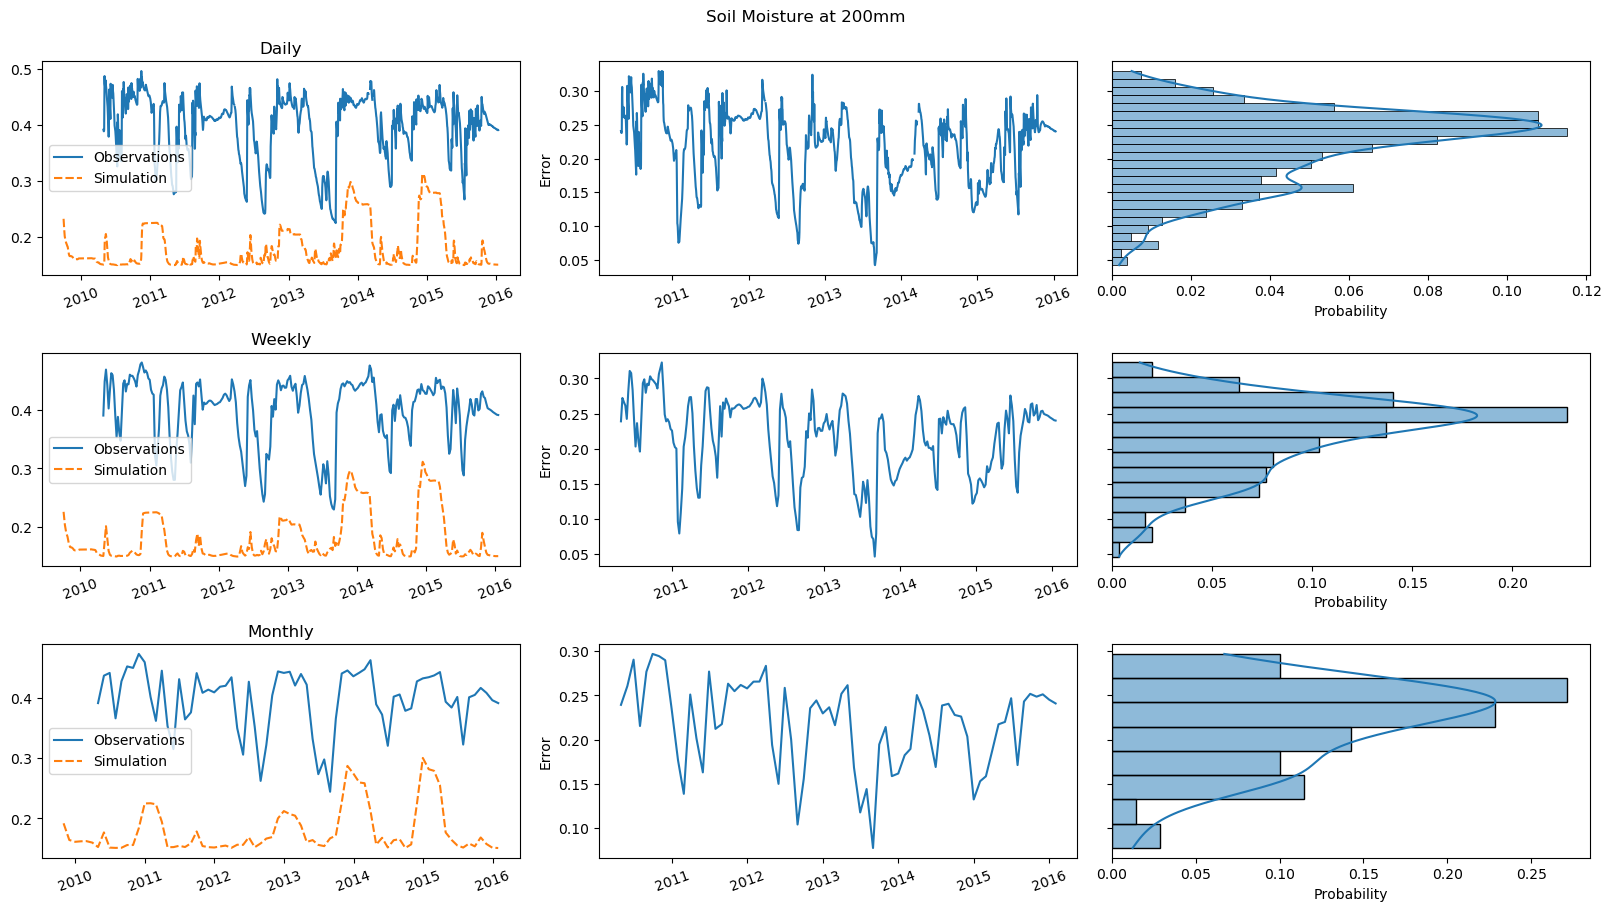

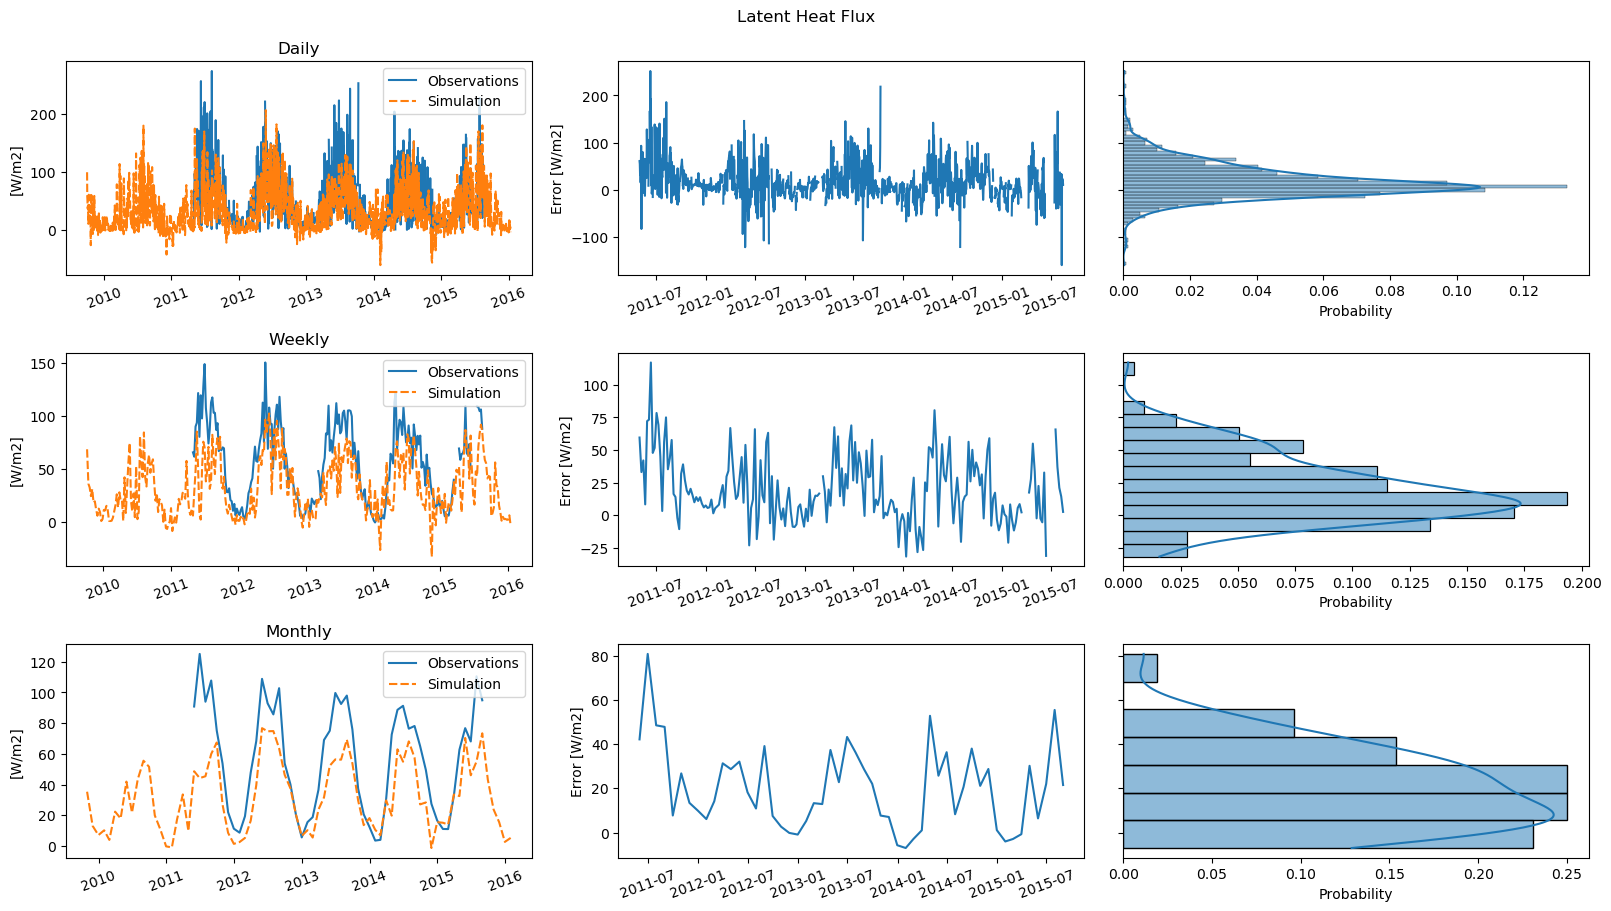

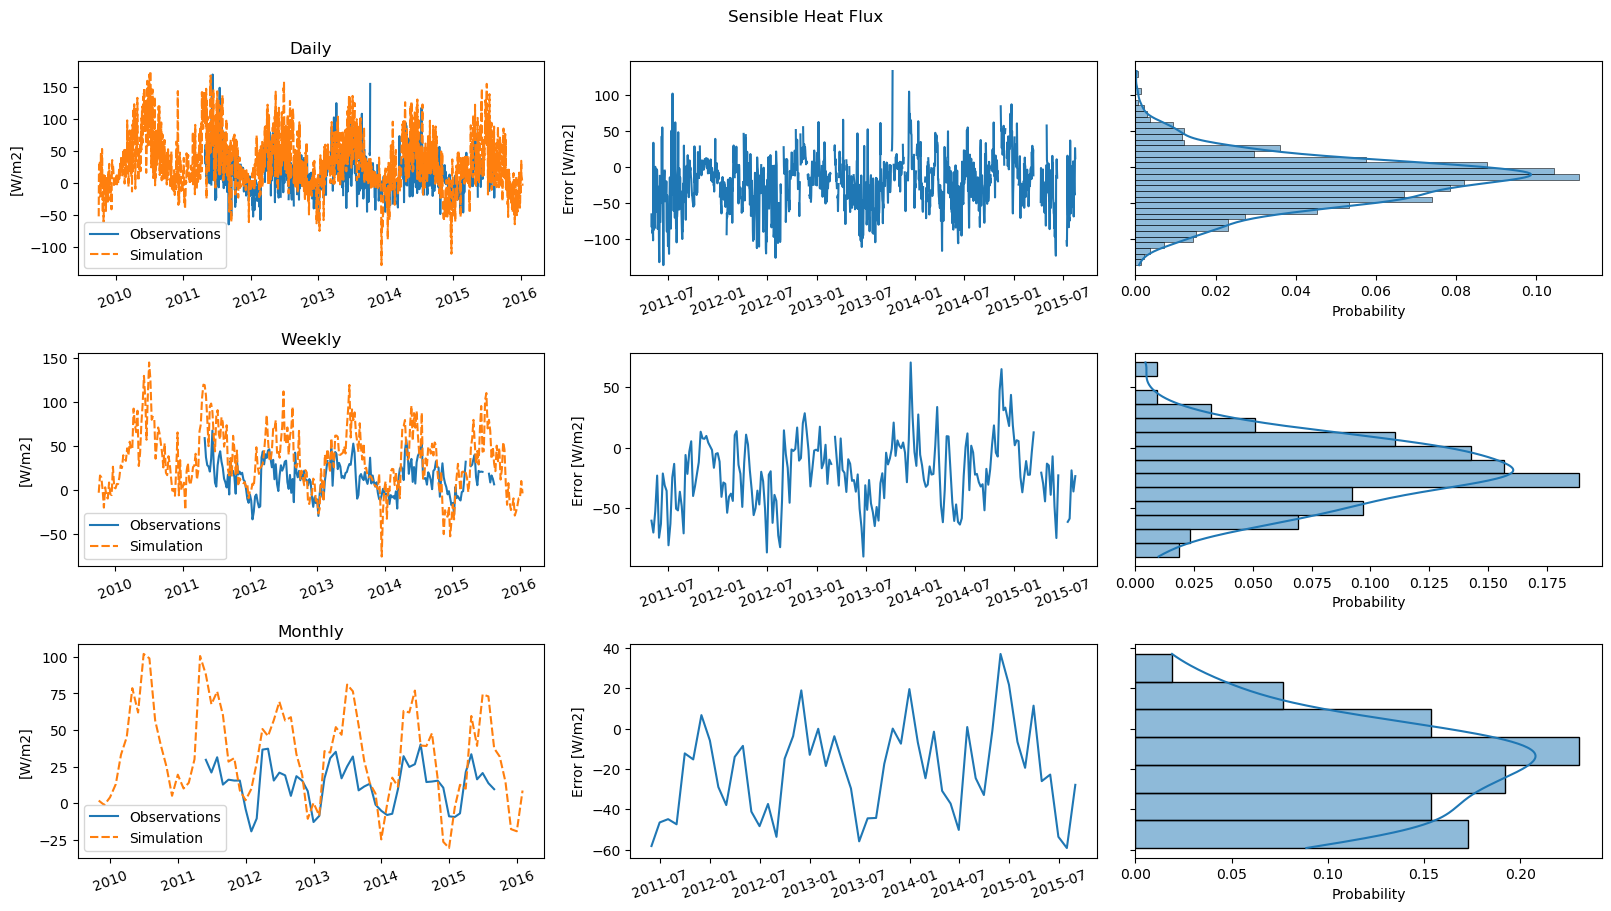

In [6]:
for col in observations.columns:
    try:
        desc = col.replace('_', ' ').title()
        fig = comparison_plot(observations[col], simulation[col],desc=desc)
        plt.show()
    except:
        pass